In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('CIPLA.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4690 non-null   float64
 14  %Deliverble         4690 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2354.000000,4.690000e+03,4690.000000
mean,534.955601,535.872454,543.950413,526.611030,534.888163,534.839575,535.331875,1.468550e+06,7.053704e+13,42474.245964,7.263396e+05,0.514499
std,289.316971,289.925664,295.102022,283.777267,289.114097,289.111287,289.358045,2.185267e+06,1.437652e+14,40645.124465,7.226814e+05,0.151574
min,160.100000,150.550000,169.450000,145.000000,152.000000,160.100000,158.140000,5.050000e+02,5.400606e+10,613.000000,2.013000e+03,0.069300
25%,307.200000,307.925000,310.975000,304.037500,307.037500,307.200000,307.392500,3.642448e+05,1.412130e+13,21320.750000,2.765862e+05,0.414200
50%,464.725000,465.000000,470.000000,459.175000,463.825000,464.725000,464.085000,1.029650e+06,3.613936e+13,31982.500000,5.648310e+05,0.520000
75%,661.712500,664.912500,674.000000,652.025000,661.375000,661.712500,663.610000,1.736628e+06,7.395739e+13,47362.500000,9.542728e+05,0.618950
max,1465.250000,1537.000000,1537.000000,1430.000000,1466.050000,1465.250000,1460.430000,5.689556e+07,4.498902e+15,603361.000000,1.081558e+07,0.994500


In [ ]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [ ]:
# Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[ 8.17035115e-01  6.35252631e-01 -4.55996969e-01 -1.54690211e-07]


In [ ]:
print(regressor.intercept_)

0.574279415746787


In [ ]:
predicted = regressor.predict(x_test)

In [ ]:
print(predicted)

[269.90477105 182.02361663 345.0153669  ... 935.79446197 530.10122272
 770.64729086]


In [ ]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [ ]:
df2.head(30)

,Actual,Predicted
0,273.25,269.904771
1,182.00,182.023617
2,342.55,345.015367
3,611.00,615.074844
4,170.35,171.458113
5,623.90,618.778452
6,563.05,580.018244
7,580.50,578.717826
8,317.80,318.094657
9,461.25,460.126825


In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 3.77540233903091
Mean Squared Error: 60.44873594710311
Root Mean Squared Error: 7.77487851654951


In [ ]:
graph = df2.head(20)

<Axes: >

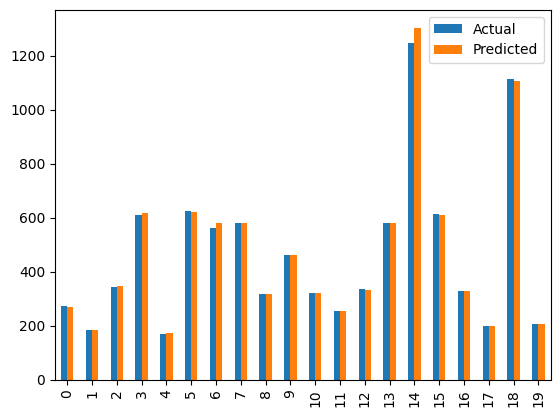

In [ ]:
graph.plot(kind='bar')